# Demo for Model Serving

In [1]:
from config.gcp_resource import *

## In-Class Demo for Model Prediction Serve

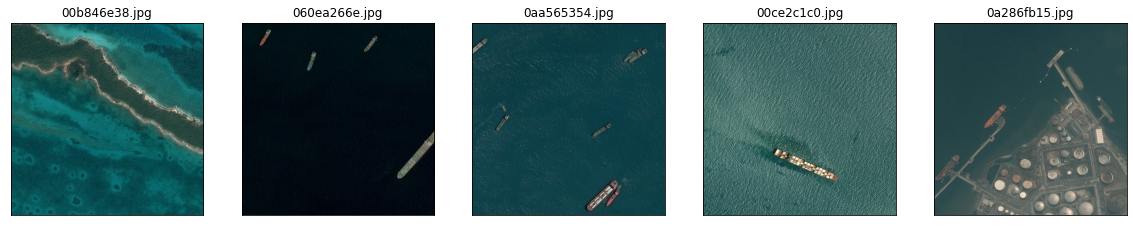

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import google.cloud.aiplatform as aip
from google.cloud import storage
from io import BytesIO
from PIL import Image

aip.init(project=PROJECT_ID, location=REGION)
client = storage.Client() # Implicit environment set up
bucket = client.get_bucket('mle_airbus_dataset')
fname_list = ['00b846e38.jpg', '060ea266e.jpg', '0aa565354.jpg', '00ce2c1c0.jpg', '0a286fb15.jpg']
#fname_list = ['00f34434e.jpg', '0a8d5d261.jpg', '0a47fd117.jpg', '0ace4520c.jpg', '0afa92ce8.jpg']
img_ori_list = []

for fname in fname_list:
    blob = bucket.get_blob(f'train_v2/{fname}')
    img_big = Image.open(BytesIO(blob.download_as_bytes()))
    img_ori_list.append(img_big)
    

fig, axs = plt.subplots(1, len(fname_list), figsize=(20, 20))
for idx, image in enumerate(img_ori_list):
    axs[idx].imshow(image)
    axs[idx].set_xticklabels([])
    axs[idx].set_xticks([])
    axs[idx].set_yticklabels([])
    axs[idx].set_yticks([])
    axs[idx].set_title(fname_list[idx])

## Can you take a guess how the segmentation image will look like ?

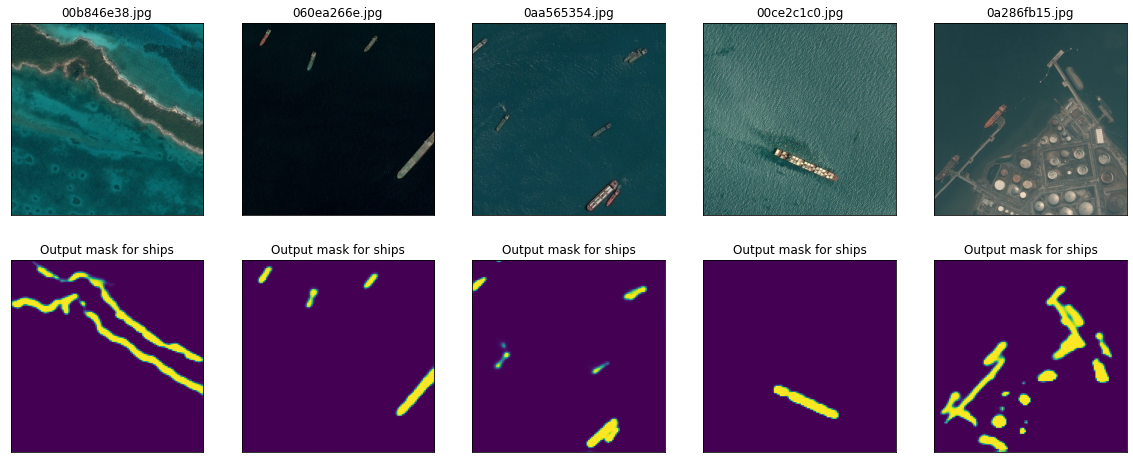

In [3]:
endpoint = aip.Endpoint(f'4643738981400313856') 

fig, axs = plt.subplots(2, len(fname_list), figsize=(20, 8))

for idx, image in enumerate(img_ori_list):

    img = image.resize((128, 128))
    input_img = (np.array(img.getdata())/255.0).reshape(128, 128, 3).tolist()
    prediction = endpoint.predict(instances=[input_img])
    result = np.array(prediction.predictions)[0]

    axs[0][idx].imshow(image)
    axs[0][idx].set_title(fname_list[idx])
    axs[1][idx].imshow(result)
    axs[1][idx].set_title('Output mask for ships')
    axs[0][idx].set_xticklabels([])
    axs[0][idx].set_xticks([])
    axs[0][idx].set_yticklabels([])
    axs[0][idx].set_yticks([])
    axs[1][idx].set_xticklabels([])
    axs[1][idx].set_xticks([])
    axs[1][idx].set_yticklabels([])
    axs[1][idx].set_yticks([])    